In [1]:
from pathlib import Path

import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_pth = Path("/home/mmhamdi/workspace/unsupervised/Unsupervised-Anomlay-Detection/data/wilddash2")
name = "rs19_val"
railsem_pth = dataset_pth / name

In [3]:
imgs = sorted(list((railsem_pth / "jpgs" / name).iterdir()))
annotations_uint = sorted(list((railsem_pth / "uint8" / name).iterdir()))
config_json = json.load(open(dataset_pth / name / "rs19-config.json", "r"))

In [30]:
idx = 1
img = cv2.imread(imgs[idx].as_posix())
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(annotations_uint[idx].as_posix(), 0)

In [31]:
def extract_cls_from_json(config_json):
    return {cls["name"] : idx for idx, cls in enumerate(config_json["labels"])}

In [32]:
cls = extract_cls_from_json(config_json)

In [33]:
cls

{'road': 0,
 'sidewalk': 1,
 'construction': 2,
 'tram-track': 3,
 'fence': 4,
 'pole': 5,
 'traffic-light': 6,
 'traffic-sign': 7,
 'vegetation': 8,
 'terrain': 9,
 'sky': 10,
 'human': 11,
 'rail-track': 12,
 'car': 13,
 'truck': 14,
 'trackbed': 15,
 'on-rails': 16,
 'rail-raised': 17,
 'rail-embedded': 18}

In [34]:
mask = cv2.resize(mask, (352, 352))

In [35]:
masks = [(mask == idx) for idx in cls.values()]
masks = np.stack(masks, axis=-1)

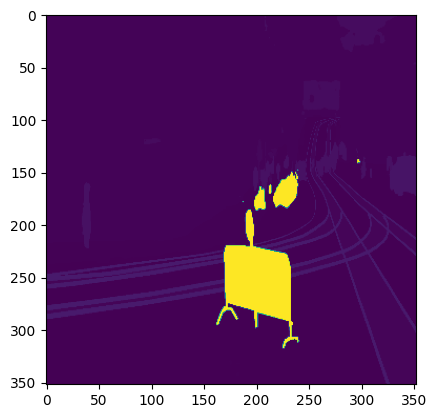

In [36]:
plt.imshow(mask)

In [37]:
np.unique(mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  20,  21,  22,  23,  25,  26,  27,
        28,  30,  32,  35,  38,  41,  42,  43,  44,  45,  46,  48,  49,
        50,  51,  52,  56,  58,  59,  61,  63,  65,  69,  74,  82,  84,
        86,  90,  93,  99, 101, 104, 105, 106, 107, 113, 114, 119, 121,
       123, 125, 126, 128, 129, 130, 132, 138, 139, 142, 147, 150, 153,
       154, 155, 156, 159, 163, 165, 166, 171, 174, 178, 185, 187, 189,
       190, 193, 195, 200, 201, 203, 204, 206, 210, 212, 213, 216, 217,
       218, 220, 221, 222, 223, 228, 229, 233, 237, 239, 241, 242, 243,
       245, 246, 247, 249, 251, 252, 255], dtype=uint8)

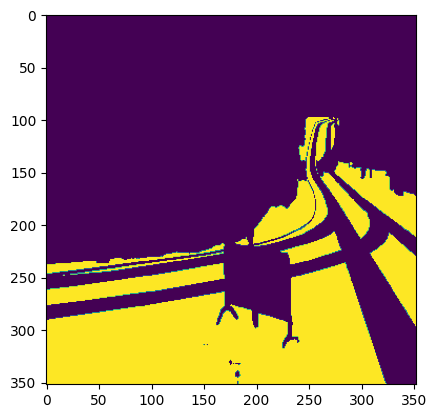

In [42]:
plt.imshow(masks[:, :, 0])

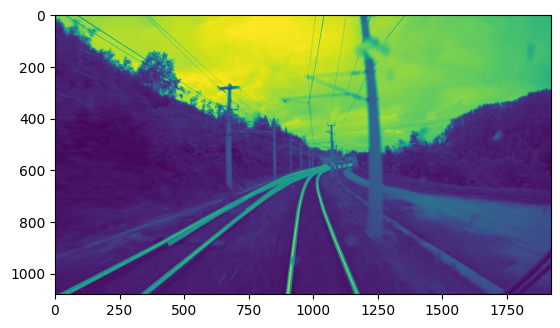

In [18]:
plt.imshow(100 * mask[:, :, 17] + img[:, :, 2])

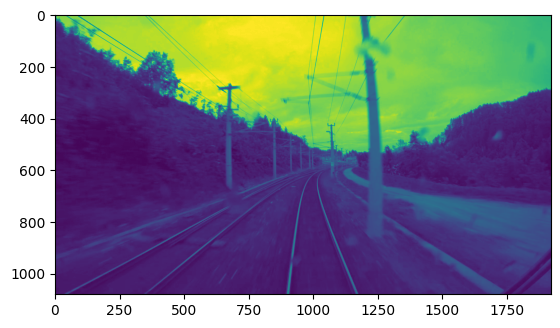

In [14]:
plt.imshow(img[:, :, 2])

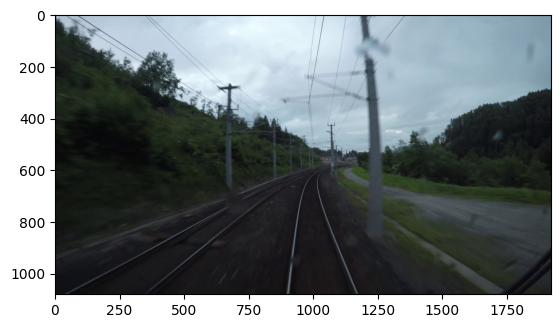

In [65]:
plt.imshow(img)